In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('car data.csv')

In [3]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
df.shape

(301, 9)

In [5]:
print(df['Seller_Type'].unique())
print(df['Fuel_Type'].unique())
print(df['Transmission'].unique())
print(df['Owner'].unique())

['Dealer' 'Individual']
['Petrol' 'Diesel' 'CNG']
['Manual' 'Automatic']
[0 1 3]


In [6]:
# check missing or null values
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [7]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [8]:
final_dataset = df[['Year','Selling_Price','Present_Price','Kms_Driven','Fuel_Type','Seller_Type','Transmission','Owner']]

In [9]:
final_dataset.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [10]:
final_dataset['Current_Year'] = 2020

In [11]:
final_dataset.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current_Year
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2020
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2020
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2020
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2020
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2020


In [12]:
final_dataset['no_year'] = final_dataset['Current_Year'] - final_dataset['Year']

In [13]:
final_dataset.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current_Year,no_year
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2020,6
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2020,7
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2020,3
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2020,9
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2020,6


In [14]:
final_dataset.drop(['Year','Current_Year'],axis=1,inplace=True)

In [15]:
final_dataset.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,no_year
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,6
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,7
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,3
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,9
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,6


In [16]:
final_dataset = pd.get_dummies(final_dataset,drop_first=True)

In [17]:
final_dataset.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,no_year,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,6,0,1,0,1
1,4.75,9.54,43000,0,7,1,0,0,1
2,7.25,9.85,6900,0,3,0,1,0,1
3,2.85,4.15,5200,0,9,0,1,0,1
4,4.60,6.87,42450,0,6,1,0,0,1


In [18]:
final_dataset.corr()

,Selling_Price,Present_Price,Kms_Driven,Owner,no_year,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
Selling_Price,1.000000,0.878983,0.029187,-0.088344,-0.236141,0.552339,-0.540571,-0.550724,-0.367128
Present_Price,0.878983,1.000000,0.203647,0.008057,0.047584,0.473306,-0.465244,-0.512030,-0.348715
Kms_Driven,0.029187,0.203647,1.000000,0.089216,0.524342,0.172515,-0.172874,-0.101419,-0.162510
Owner,-0.088344,0.008057,0.089216,1.000000,0.182104,-0.053469,0.055687,0.124269,-0.050316
no_year,-0.236141,0.047584,0.524342,0.182104,1.000000,-0.064315,0.059959,0.039896,-0.000394
Fuel_Type_Diesel,0.552339,0.473306,0.172515,-0.053469,-0.064315,1.000000,-0.979648,-0.350467,-0.098643
Fuel_Type_Petrol,-0.540571,-0.465244,-0.172874,0.055687,0.059959,-0.979648,1.000000,0.358321,0.091013
Seller_Type_Individual,-0.550724,-0.512030,-0.101419,0.124269,0.039896,-0.350467,0.358321,1.000000,0.063240
Transmission_Manual,-0.367128,-0.348715,-0.162510,-0.050316,-0.000394,-0.098643,0.091013,0.063240,1.000000


In [19]:
import seaborn as sns

C:\Users\Saumyaa\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [20]:
#sns.pairplot(final_dataset)

In [21]:
import matplotlib.pyplot as plt

In [22]:
%matplotlib inline

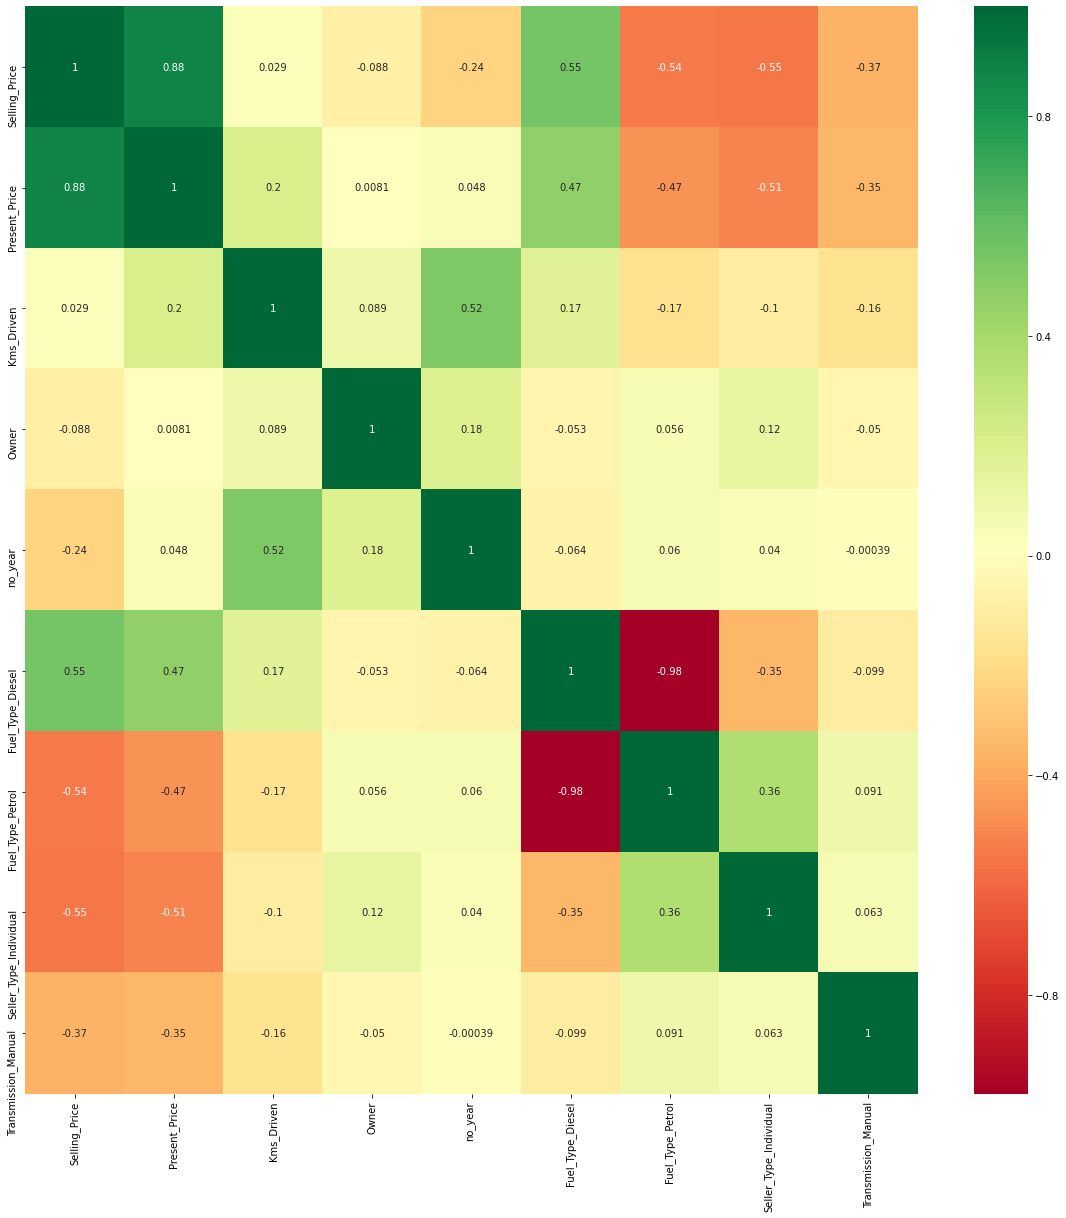

In [23]:
corrmat = final_dataset.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
g = sns.heatmap(final_dataset[top_corr_features].corr(),annot=True,cmap='RdYlGn')

In [24]:
final_dataset.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,no_year,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,6,0,1,0,1
1,4.75,9.54,43000,0,7,1,0,0,1
2,7.25,9.85,6900,0,3,0,1,0,1
3,2.85,4.15,5200,0,9,0,1,0,1
4,4.60,6.87,42450,0,6,1,0,0,1


In [25]:
X=final_dataset.iloc[:,1:]
y=final_dataset.iloc[:,0]

In [26]:
X.head()

,Present_Price,Kms_Driven,Owner,no_year,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,5.59,27000,0,6,0,1,0,1
1,9.54,43000,0,7,1,0,0,1
2,9.85,6900,0,3,0,1,0,1
3,4.15,5200,0,9,0,1,0,1
4,6.87,42450,0,6,1,0,0,1


In [27]:
y.head()

0    3.35
1    4.75
2    7.25
3    2.85
4    4.60
Name: Selling_Price, dtype: float64

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [30]:
print('Train cases as below')
print('X_train shape: ',X_train.shape)
print('y_train shape: ',y_train.shape)
print('\nTest cases as below')
print('X_test shape: ',X_test.shape)
print('y_test shape: ',y_test.shape)

Train cases as below
X_train shape:  (240, 8)
y_train shape:  (240,)

Test cases as below
X_test shape:  (61, 8)
y_test shape:  (61,)


In [31]:
from sklearn.linear_model import LinearRegression

In [32]:
lr_model = LinearRegression(fit_intercept=True)

In [33]:
lr_model.fit(X_train,y_train)

LinearRegression()

In [34]:
pd.DataFrame((lr_model.coef_).T,index=X_train.columns,columns=['Co-efficients']).sort_values('Co-efficients',ascending=False)

,Co-efficients
Fuel_Type_Diesel,2.230508
Fuel_Type_Petrol,0.458549
Present_Price,0.437234
Owner,0.345913
Kms_Driven,-0.000005
no_year,-0.413270
Seller_Type_Individual,-1.209278
Transmission_Manual,-1.870143


In [35]:
print(lr_model.intercept_)

5.420679539940572


In [36]:
y_pred_test = lr_model.predict(X_test)
y_pred_test

array([ 7.86273200e+00,  2.96828691e+00, -5.90305107e-01,  4.21335952e+00,
        4.83175534e-01,  5.82053813e+00,  1.95679784e+00,  2.55809661e+00,
        7.70870833e+00,  9.78692192e-01,  8.13484343e+00,  3.51207180e+00,
        4.90669281e+00,  4.63905587e+00, -2.15886643e+00,  3.13874624e+00,
        7.98256903e+00,  6.75937638e+00,  6.90426580e+00,  8.01440587e+00,
        4.31168610e+00,  4.00336757e+00,  1.13040883e+01,  8.07939189e+00,
        9.54399823e+00,  3.52133877e+00,  3.80609808e+00,  1.06074722e+00,
       -6.01732475e-01, -6.19712043e-01,  1.32818516e-03, -1.28500691e+00,
        4.28533553e+00,  2.06769487e+01,  1.87563232e+01,  4.27292100e+00,
        3.48602852e+00,  1.66739677e+00, -4.38707073e-02,  5.78536030e+00,
        8.03940428e+00,  9.88367483e+00,  4.09684249e-01,  6.07997517e+00,
        5.88038915e+00,  4.32745252e+00,  7.37534505e+00,  5.86171335e+00,
        8.21129880e+00,  1.65455816e+00,  3.83033706e+00,  1.75047060e+00,
        2.51406796e+00,  

In [37]:
y_pred_train = lr_model.predict(X_train)
y_pred_train

array([ 2.31704897e+00,  1.05163363e+01,  6.20814665e+00, -1.06078712e+00,
        9.96478209e-01,  1.43640299e-01,  5.27322395e-01,  7.27105805e+00,
       -3.98904720e-02,  7.46755769e+00,  8.61755418e+00,  8.45780695e+00,
        8.95277254e-01,  1.33240533e+00,  1.86831115e+00,  2.08700552e+00,
        8.24412576e+00,  9.24152474e+00,  4.22694570e+00,  3.94652427e+00,
        1.89316660e+00,  1.02767156e+01,  1.02111196e+01,  1.70706741e+00,
        6.58675295e+00,  2.18145255e+00,  1.44752842e+00,  1.45937116e+00,
        6.29264381e+00,  4.44566215e+00,  5.63779787e+00,  3.14561460e+00,
        2.20473291e+00,  1.00274779e+01,  9.95038120e+00, -1.72633003e-01,
        1.61377713e+00,  4.51488425e-01,  7.92977311e-01,  1.62645387e+00,
        8.14732585e+00,  3.02182757e+00,  1.72565120e+01,  3.64387509e+00,
       -4.57765217e-02,  3.02915123e-01,  1.75641451e+00,  7.09008063e-01,
        1.03243435e+01,  4.26632444e+00,  7.90740226e+00,  5.14394775e+00,
       -1.62355512e+00,  

In [38]:
from sklearn import metrics

In [39]:
df_metrics = pd.DataFrame()
df_metrics['Type'] = ['MAE','MSE','RMSE','R-Squared']
df_metrics['Train'] = pd.Series([metrics.mean_absolute_error(y_train,y_pred_train),
                                 metrics.mean_squared_error(y_train,y_pred_train),
                                 np.sqrt(metrics.mean_squared_error(y_train,y_pred_train)),
                                 metrics.r2_score(y_train,y_pred_train)
                                ])
df_metrics['Test'] = pd.Series([metrics.mean_absolute_error(y_test,y_pred_test),
                                 metrics.mean_squared_error(y_test,y_pred_test),
                                 np.sqrt(metrics.mean_squared_error(y_test,y_pred_test)),
                                 metrics.r2_score(y_test,y_pred_test)
                                ])

In [40]:
from sklearn.preprocessing import StandardScaler

In [41]:
scaler = StandardScaler().fit(final_dataset)
final_dataset1 = scaler.transform(final_dataset)
final_dataset1

array([[-0.25841591, -0.23621461, -0.25622446, ...,  0.50932723,
        -0.73728539,  0.39148015],
       [ 0.01748088,  0.22150462,  0.1559105 , ..., -1.96337432,
        -0.73728539,  0.39148015],
       [ 0.51015372,  0.25742689, -0.77396901, ...,  0.50932723,
        -0.73728539,  0.39148015],
       ...,
       [-0.25841591,  0.39068691,  1.31334003, ...,  0.50932723,
        -0.73728539,  0.39148015],
       [ 1.34769755,  0.56450434, -0.7198763 , ..., -1.96337432,
        -0.73728539,  0.39148015],
       [ 0.12586891, -0.20029235, -0.81095812, ...,  0.50932723,
        -0.73728539,  0.39148015]])

In [42]:
final_dataset1 = pd.DataFrame(final_dataset1)
final_dataset1.head()

,0,1,2,3,4,5,6,7,8
0,-0.258416,-0.236215,-0.256224,-0.174501,-0.128897,-0.498962,0.509327,-0.737285,0.39148
1,0.017481,0.221505,0.155911,-0.174501,0.217514,2.004162,-1.963374,-0.737285,0.39148
2,0.510154,0.257427,-0.773969,-0.174501,-1.168129,-0.498962,0.509327,-0.737285,0.39148
3,-0.356950,-0.403079,-0.817758,-0.174501,0.910335,-0.498962,0.509327,-0.737285,0.39148
4,-0.012079,-0.087890,0.141743,-0.174501,-0.128897,2.004162,-1.963374,-0.737285,0.39148


In [43]:
final_dataset1.columns = [final_dataset.columns]
final_dataset1.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,no_year,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,-0.258416,-0.236215,-0.256224,-0.174501,-0.128897,-0.498962,0.509327,-0.737285,0.39148
1,0.017481,0.221505,0.155911,-0.174501,0.217514,2.004162,-1.963374,-0.737285,0.39148
2,0.510154,0.257427,-0.773969,-0.174501,-1.168129,-0.498962,0.509327,-0.737285,0.39148
3,-0.356950,-0.403079,-0.817758,-0.174501,0.910335,-0.498962,0.509327,-0.737285,0.39148
4,-0.012079,-0.087890,0.141743,-0.174501,-0.128897,2.004162,-1.963374,-0.737285,0.39148


In [44]:
X1=final_dataset1.iloc[:,1:]
y1=final_dataset1.iloc[:,0]

In [45]:
X1.head()

,Present_Price,Kms_Driven,Owner,no_year,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,-0.236215,-0.256224,-0.174501,-0.128897,-0.498962,0.509327,-0.737285,0.39148
1,0.221505,0.155911,-0.174501,0.217514,2.004162,-1.963374,-0.737285,0.39148
2,0.257427,-0.773969,-0.174501,-1.168129,-0.498962,0.509327,-0.737285,0.39148
3,-0.403079,-0.817758,-0.174501,0.910335,-0.498962,0.509327,-0.737285,0.39148
4,-0.087890,0.141743,-0.174501,-0.128897,2.004162,-1.963374,-0.737285,0.39148


In [46]:
y1.head()

0   -0.258416
1    0.017481
2    0.510154
3   -0.356950
4   -0.012079
Name: (Selling_Price,), dtype: float64

In [47]:
X_train1,X_test1,y_train1,y_test1 = train_test_split(X1,y1,test_size=0.2,random_state=1)

In [48]:
lr_model1 = LinearRegression(fit_intercept=True)

In [49]:
lr_model1.fit(X_train1,y_train1)

LinearRegression()

In [50]:
pd.DataFrame((lr_model1.coef_).T,index=X_train1.columns,columns=['Co-efficients']).sort_values('Co-efficients',ascending=False)

,Co-efficients
Present_Price,0.743585
Fuel_Type_Diesel,0.175606
Fuel_Type_Petrol,0.036545
Owner,0.016872
Kms_Driven,-0.040595
Seller_Type_Individual,-0.113828
Transmission_Manual,-0.125106
no_year,-0.235105


In [51]:
y_pred_train1 = lr_model1.predict(X_train1)
y_pred_test1 = lr_model1.predict(X_test1)

In [52]:
df_metrics['Train_StdScale'] = pd.Series([metrics.mean_absolute_error(y_train1,y_pred_train1),
                                 metrics.mean_squared_error(y_train1,y_pred_train1),
                                 np.sqrt(metrics.mean_squared_error(y_train1,y_pred_train1)),
                                 metrics.r2_score(y_train1,y_pred_train1)
                                ])
df_metrics['Test_StdScale'] = pd.Series([metrics.mean_absolute_error(y_test1,y_pred_test1),
                                 metrics.mean_squared_error(y_test1,y_pred_test1),
                                 np.sqrt(metrics.mean_squared_error(y_test1,y_pred_test1)),
                                 metrics.r2_score(y_test1,y_pred_test1)
                                ])

In [53]:
df_metrics

,Type,Train,Test,Train_StdScale,Test_StdScale
0,MAE,1.207224,1.099858,0.237907,0.216748
1,MSE,3.151895,2.982385,0.122408,0.115825
2,RMSE,1.775358,1.726958,0.349868,0.340330
3,R-Squared,0.882278,0.862526,0.882278,0.862526


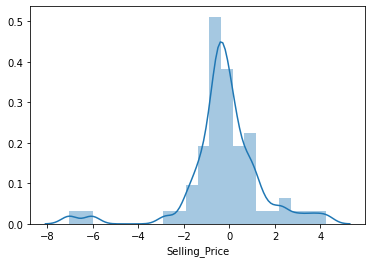

In [54]:
sns.distplot(y_test-y_pred_test)

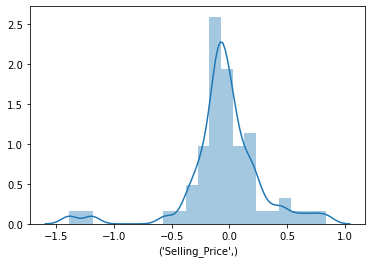

In [55]:
sns.distplot(y_test1-y_pred_test1)

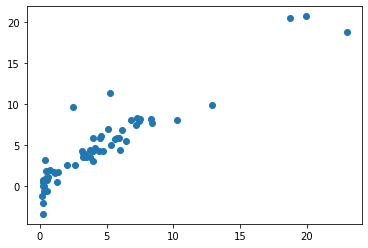

In [56]:
plt.scatter(y_test,y_pred_test)

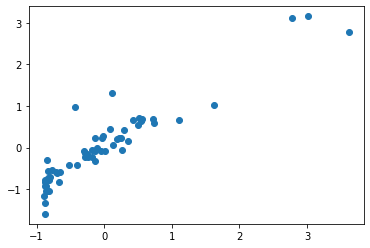

In [57]:
plt.scatter(y_test1,y_pred_test1)

In [58]:
import pickle

In [59]:
#open a file, where you want to store the data
file = open('lr_model.pkl','wb')

#dump information to that file
pickle.dump(lr_model,file)